## Data Wrangling

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Read a csv file
data = pd.read_csv('C:/Users/Julia/Documents/_DATA SCIENCE/_Capstones/Capstone 2/Data/healthcare-dataset-stroke-data.csv')

In [3]:
# Get csv file info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Print the dataframe
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### First I want to check if there are duplicate values in the id column to be sure that the information for the same patient isn't repeated twice.

In [5]:
# Check if there are any duplicate values in the 'id' column of the 'data' DataFrame
data['id'].duplicated().any()

False

### There are no duplicate id numbers.
### I think we can drop 'id' column as it is redundant.

In [6]:
# Remove the 'id' column from the DataFrame
data = data.drop(columns='id', axis=1)

In [7]:
# Print 5 first rows of the DataFrame
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Distribution of categorical variables

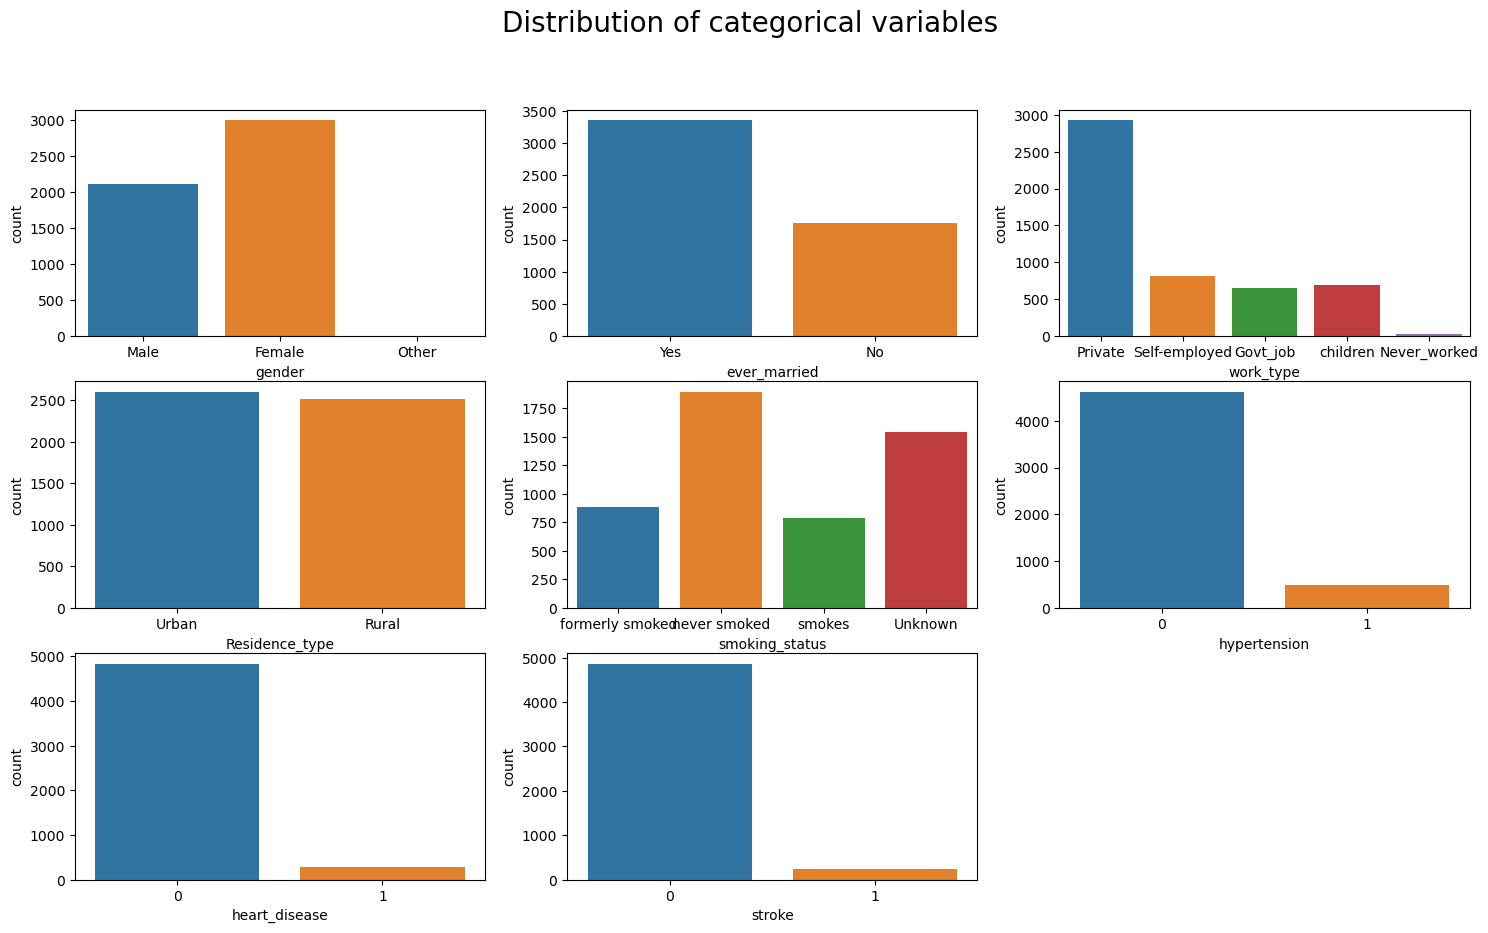

In [8]:
# Create a 3x3 grid of subplots 
fig, ax = plt.subplots(3,3)
# Display countplots of different categorical variables using seaborn
sns.countplot(data=data,x='gender',ax =ax[0,0])
sns.countplot(data=data, x='ever_married',ax=ax[0,1])
sns.countplot(data=data,x='work_type',ax=ax[0,2])
sns.countplot(data=data,x='Residence_type',ax=ax[1,0])
sns.countplot(data=data,x='smoking_status',ax=ax[1,1])
sns.countplot(data=data,x='hypertension',ax=ax[1,2])
sns.countplot(data=data,x='heart_disease',ax=ax[2,0])
sns.countplot(data=data,x='stroke',ax=ax[2,1])
# Remove the last subplot since it's not needed
fig.delaxes(ax=ax[2][2])
# Set the figure size and title, then show the plot
fig.set_size_inches(18, 10)
fig.suptitle('Distribution of categorical variables',fontsize=20)
plt.show()

### Distribution of continuous variables

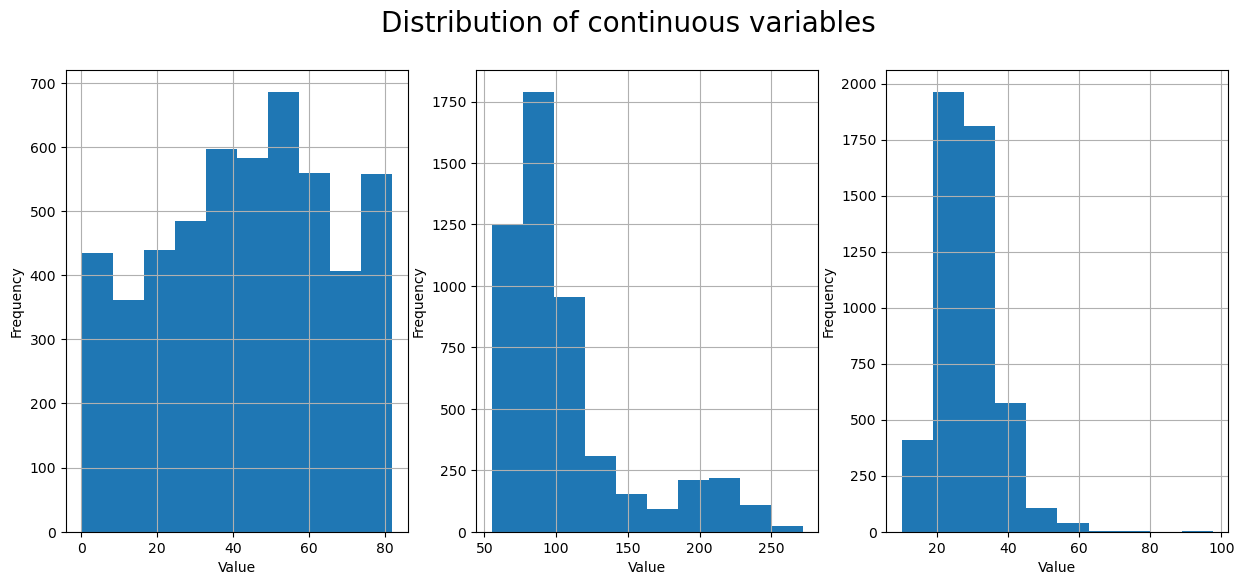

In [9]:
# Create a histogram plot of three continuous variables using Pandas
fig, ax = plt.subplots(figsize=(15, 6), ncols=3)
data['age'].hist(ax=ax[0])
data['avg_glucose_level'].hist(ax=ax[1])
data['bmi'].hist(ax=ax[2])
# Add x and y axis labels to each subplot
for i in range(3):
    ax[i].set_xlabel('Value')
    ax[i].set_ylabel('Frequency')
# Add a super-title to the plot
fig.suptitle('Distribution of continuous variables', fontsize=20)
# Show the plot
plt.show()

### There are very low 'age' values, as well as 'children' category in a 'work_type' column, suggesting that there are data for children included in this dataset. 

### Next I'm going to check which age values correspond to 'children' value to make sure that data is in fact on children. 

In [10]:
# Compute the descriptive statistics for the 'age' column of the subset of data where 'work_type' is 'children'
data.loc[data['work_type'] == 'children','age'].describe()

count    687.000000
mean       6.841339
std        4.533364
min        0.080000
25%        2.000000
50%        6.000000
75%       11.000000
max       16.000000
Name: age, dtype: float64

### Age range for 'children' category is 0.08-16
### Even though it is possible for a child to have a stroke, it is very rare and normally caused by completely different reasons than those being studied in this project. Therefore I think it is appropriate to drop rows that contain data on children patients. 

In [11]:
# Create a new subset of the original data that excludes observations where 'work_type' is 'children'
data_adult = data[data.work_type != 'children']

In [12]:
# Compute the descriptive statistics for the 'age' column
data_adult['age'].describe()

count    4423.000000
mean       48.878137
std        18.707171
min         7.000000
25%        34.000000
50%        49.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64

### Even though I dropped 'children' category, data above show that there are still low 'age' values, therefore I will use maximum age for 'children' category (16) as a threshold and will drop all rows with ages 16 and below

In [13]:
# Create a new subset of the original data that only includes observations of individuals older than 16 years
data_adult = data[data.age > 16]

In [14]:
# Compute the descriptive statistics for the 'age' column
data_adult.age.describe()

count    4314.000000
mean       49.740380
std        18.126633
min        17.000000
25%        35.000000
50%        50.000000
75%        64.000000
max        82.000000
Name: age, dtype: float64

In [15]:
# Reset the index of the 'data_adult' dataframe after removing observations
# This drops the current index and replaces it with a new one, and modifies the 'data_adult' dataframe in place
data_adult.reset_index(drop=True,inplace=True)

### There is an single value 'other' in the 'gender' column that can be dropped.

In [16]:
# Create a new subset of the 'data_adult' dataframe that excludes observations with gender labeled as 'Other'
data_adult = data_adult[data_adult.gender != 'Other']

In [17]:
# Check for missing values in the 'data_adult' dataframe
# The 'isna()' method returns a boolean dataframe where 'True' indicates the presence of a missing value
# The 'any()' method then checks whether there is at least one missing value in each column
data_adult.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [18]:
# Save the 'data_adult' dataframe to a CSV file
# The 'to_csv()' method writes the dataframe to a CSV file with the specified file path
# 'index=True' includes the index column in the CSV file
data_adult.to_csv(r'C:/Users/Julia/Documents/_DATA SCIENCE/_Capstones/Capstone 2/Data/Data_adult.csv', index=True)

### Futher steps:
1. Exploratory data analyis
2. Dealing with missing values in 'bmi' column
3. Dealing for skewed distribution of 'bmi' and 'avg_glucose_level' variables.